In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mlflow.tracking import MlflowClient
from mlflow.entities import Metric

In [3]:
plt.style.use("~/nice.mplstyle")

In [4]:
def readme(batch_size, ensemble_size):
    logdir = f"/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/crps06h/experiments/batch-ensemble/bs{batch_size:02d}es{ensemble_size:02d}/logs/mlflow"
    name = [x for x in os.listdir(logdir) if "trash" not in x][0]
    client = MlflowClient(tracking_uri=f"file://{logdir}")
    runs = client.search_runs(experiment_ids=[name])
    tloss_step = np.array([x.value for x in client.get_metric_history(runs[0].info.run_id, "train_multi_dataset_loss_step")])
    vloss_step = np.array([x.value for x in client.get_metric_history(runs[0].info.run_id, "val_multi_dataset_loss_step")])
    tloss_epoch = np.array([x.value for x in client.get_metric_history(runs[0].info.run_id, "train_multi_dataset_loss_epoch")])
    vloss_epoch = np.array([x.value for x in client.get_metric_history(runs[0].info.run_id, "val_multi_dataset_loss_epoch")])
    return tloss_step, vloss_step, tloss_epoch, vloss_epoch

In [5]:
tloss_step = {}
vloss_step = {}
tloss_epoch = {}
vloss_epoch = {}
for bs in [4, 8, 16]:
    tloss_step[bs] = {}
    vloss_step[bs] = {}
    tloss_epoch[bs] = {}
    vloss_epoch[bs] = {}
    for es in [2, 4]:
        a, b, c, d = readme(bs, es)
        tloss_step[bs][es] = a
        vloss_step[bs][es] = b
        tloss_epoch[bs][es] = c
        vloss_epoch[bs][es] = d

In [6]:
es = 8
for bs in [8, 16]:
    a, b, c, d = readme(bs, es)
    tloss_step[bs][es] = a
    vloss_step[bs][es] = b
    tloss_epoch[bs][es] = c
    vloss_epoch[bs][es] = d

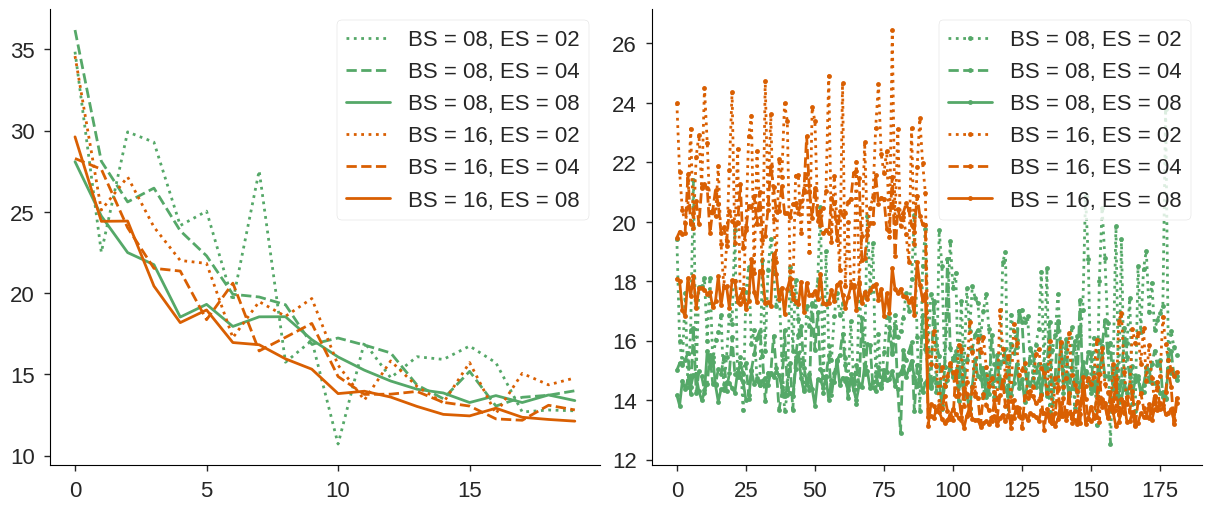

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True)

for i, bs in enumerate([8, 16]):
    for es, ls in zip([2, 4, 8], [":", "--", "-"]):
        axs[0].plot(tloss_step[bs][es], label=f"BS = {bs:02d}, ES = {es:02d}", ls=ls, color=f"C{i}")
        axs[1].plot(vloss_step[bs][es], label=f"BS = {bs:02d}, ES = {es:02d}", marker=".", ls=ls, color=f"C{i}")


[ax.legend() for ax in axs]

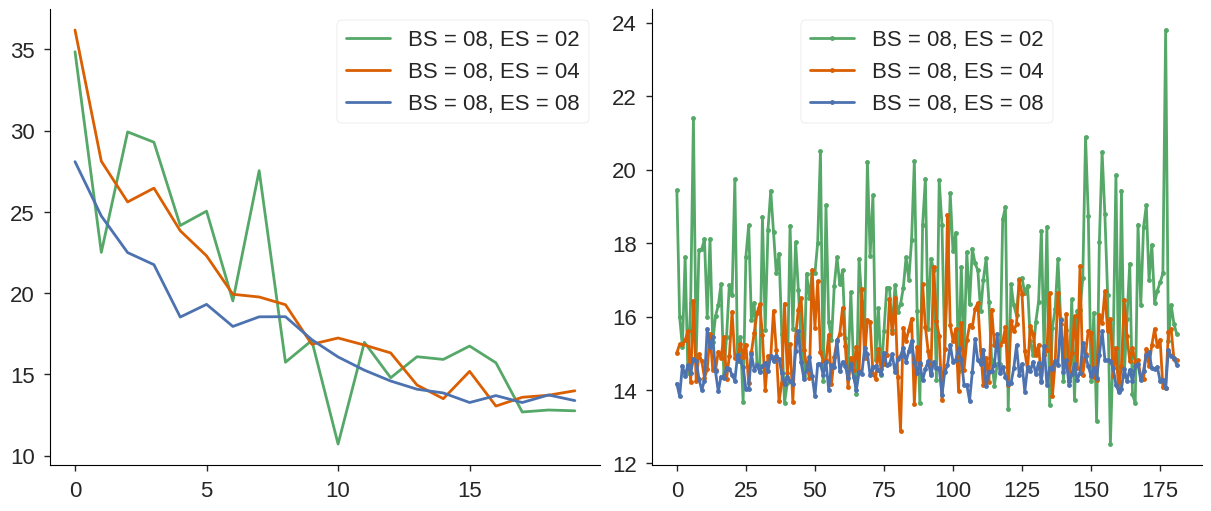

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True)

bs = 8
for es in [2, 4, 8]:
    axs[0].plot(tloss_step[bs][es], label=f"BS = {bs:02d}, ES = {es:02d}")
    axs[1].plot(vloss_step[bs][es], label=f"BS = {bs:02d}, ES = {es:02d}", marker=".")


[ax.legend() for ax in axs]

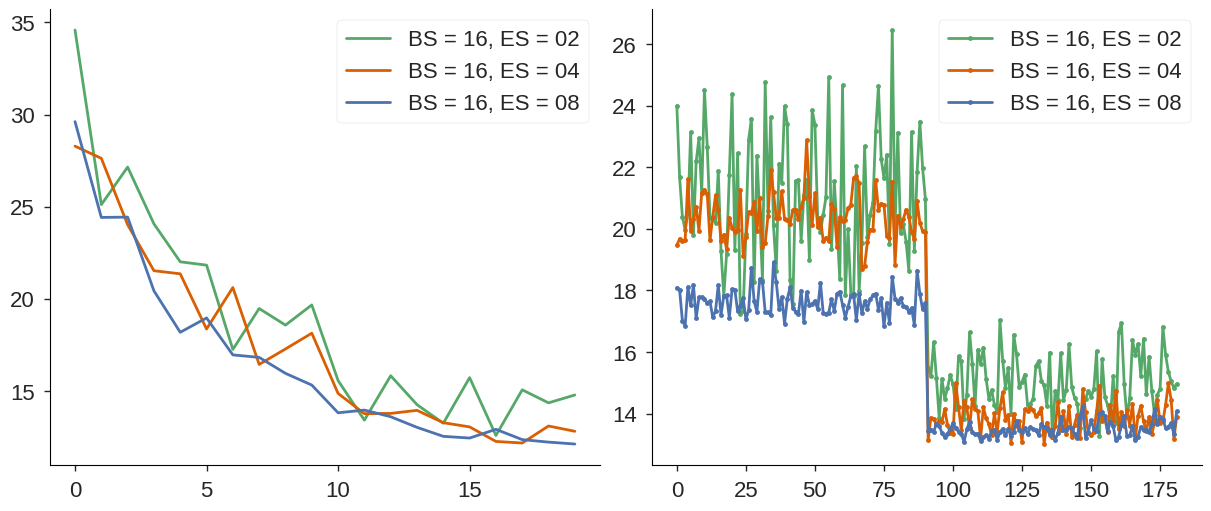

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True)

bs = 16
for es in [2, 4, 8]:
    axs[0].plot(tloss_step[bs][es], label=f"BS = {bs:02d}, ES = {es:02d}")
    axs[1].plot(vloss_step[bs][es], label=f"BS = {bs:02d}, ES = {es:02d}", marker=".")


[ax.legend() for ax in axs]

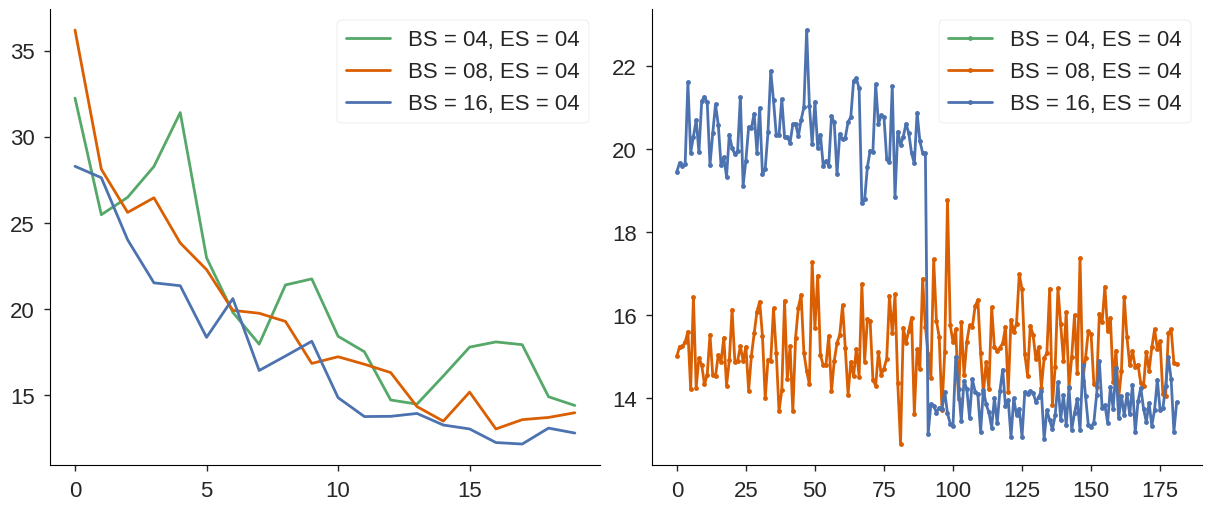

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True)

es = 4
for bs in [4, 8, 16]:
    axs[0].plot(tloss_step[bs][es], label=f"BS = {bs:02d}, ES = {es:02d}")
    axs[1].plot(vloss_step[bs][es], label=f"BS = {bs:02d}, ES = {es:02d}", marker=".")


[ax.legend() for ax in axs]

In [12]:
vloss_step[4][4]

array([], dtype=float64)